In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from wordcloud import WordCloud
import networkx as nx


from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

import nltk
from ast import literal_eval
from datetime import timedelta
import string
import statistics
import itertools
import statistics 

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import sys
sys.path.append('../')
import Variables as vr

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# create loader object
L = instaloader.Instaloader()
LIST_ALL_USERS = vr.LIST_ALL_USERS

nltk.download('stopwords')
nltk.download('punkt')


USE_LOCAL_DA = True

if (not USE_LOCAL_DA):
    
    # MongoDB Database
    instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
    instagram_db = instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

else:

    # MongoDB Database
    Local_instagramClient = pymongo.MongoClient('127.0.0.1:27017',authSource='Instagram')
    instagram_db = Local_instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# URLs

In [3]:
# https://python-graph-gallery.com/324-map-a-color-to-network-nodes/
# https://networkx.github.io/documentation/networkx-2.2/auto_examples/drawing/plot_labels_and_colors.html
# https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html
# https://stackoverflow.com/questions/25639169/networkx-change-color-width-according-to-edge-attributes-inconsistent-result

# Load impersonator posts

In [4]:
# impersonator
_limit = 10000
df_impersonator_all =  pd.DataFrame(list(instagram_col_impersonator.find({ }).limit(_limit) ))
df_impersonator_all.shape[0]

1829

In [5]:
# # post
# _limit = 10000
# df_post =  pd.DataFrame(list(instagram_col_post.find({}).limit(_limit) ))
# df_post.shape[0]

df_impersonator = df_impersonator_all[df_impersonator_all['relation_crawled'] == True]
df_impersonator.shape[0]

189

# get dataframes

In [6]:
# politician
df_impersonator_trump = df_impersonator.loc[( df_impersonator['associated_username'] == vr.DONALD_TRUMP ) ] 
df_impersonator_obama = df_impersonator.loc[( df_impersonator['associated_username'] == vr.BARACK_OBAMA ) ]
df_impersonator_macron = df_impersonator.loc[( df_impersonator['associated_username'] == vr.EMMANUEL_MACRON ) ]
df_impersonator_johnson = df_impersonator.loc[( df_impersonator['associated_username'] == vr.BORIS_JOHNSON ) ]
df_impersonator_may = df_impersonator.loc[( df_impersonator['associated_username'] == vr.THERESA_MAY ) ]

# sport player
df_impersonator_cristiano_ronalod = df_impersonator.loc[( df_impersonator['associated_username'] == vr.CRISTIANO_RONALDO ) ] 
df_impersonator_leo_messi = df_impersonator.loc[( df_impersonator['associated_username'] == vr.LEOMESSI ) ]
df_impersonator_roger_federer = df_impersonator.loc[( df_impersonator['associated_username'] == vr.ROGER_FEDERER ) ]
df_impersonator_rafael_nadal = df_impersonator.loc[( df_impersonator['associated_username'] == vr.RAFAEL_NADAL ) ]
df_impersonator_djokovic = df_impersonator.loc[( df_impersonator['associated_username'] == vr.NOVAK_DJOKOVIC ) ]

# musician
df_impersonator_lady_gaga = df_impersonator.loc[( df_impersonator['associated_username'] == vr.LADY_GAGA ) ] 
df_impersonator_beyonce = df_impersonator.loc[( df_impersonator['associated_username'] == vr.BEYONCE ) ] 
df_impersonator_taylor_swift = df_impersonator.loc[( df_impersonator['associated_username'] == vr.TAYLOR_SWIFT ) ] 
df_impersonator_adele = df_impersonator.loc[( df_impersonator['associated_username'] == vr.ADELE ) ] 
df_impersonator_madonna = df_impersonator.loc[( df_impersonator['associated_username'] == vr.MADONNA ) ] 

# Dataframe - Communities

In [7]:
df_imp_politician = pd.concat([df_impersonator_trump, df_impersonator_obama, df_impersonator_macron, df_impersonator_johnson, df_impersonator_may])
df_imp_sportplayer = pd.concat([df_impersonator_cristiano_ronalod, df_impersonator_leo_messi, df_impersonator_rafael_nadal, df_impersonator_rafael_nadal, df_impersonator_djokovic])
df_imp_musician = pd.concat([df_impersonator_lady_gaga, df_impersonator_beyonce, df_impersonator_taylor_swift, df_impersonator_adele, df_impersonator_madonna])

print("politician: " + str(df_imp_politician.shape[0]))
print("sport: " + str(df_imp_sportplayer.shape[0]))
print("musician: " + str(df_imp_musician.shape[0]))

politician: 25
sport: 54
musician: 114


In [8]:
# # Build a dataframe with your connections
# df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# # And a data frame with characteristics for your nodes
# carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group1','group2','group3','group3'] })
 
# # Build your graph
# G= nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# # The order of the node for networkX is the following order:
# G.nodes()
# # Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# # Here is the tricky part: I need to reorder carac to assign the good color to each node
# carac= carac.set_index('ID')
# carac=carac.reindex(G.nodes())
 
# # And I need to transform my categorical column in a numerical value: group1->1, group2->2...
# carac['myvalue']=pd.Categorical(carac['myvalue'])
# carac['myvalue'].cat.codes
 
# # Custom the nodes:
# nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)


In [9]:
# filter nan
df_impersonator = df_impersonator[df_impersonator['followee_list'].notnull() ] 
df_imp_politician = df_imp_politician[df_imp_politician['followee_list'].notnull() ] 
df_imp_sportplayer = df_imp_sportplayer[df_imp_sportplayer['followee_list'].notnull() ] 
df_imp_musician = df_imp_musician[df_imp_musician['followee_list'].notnull() ] 

df_impersonator = df_impersonator[df_impersonator['follower_list'].notnull() ] 
df_imp_politician = df_imp_politician[df_imp_politician['follower_list'].notnull() ] 
df_imp_sportplayer = df_imp_sportplayer[df_imp_sportplayer['follower_list'].notnull() ] 
df_imp_musician = df_imp_musician[df_imp_musician['follower_list'].notnull() ] 

In [10]:
def prepare_from_to(_df_impersonator):
    
    df_impersonator = _df_impersonator
    
    list_from = []
    list_to = []
    list_all_users = []

    def convert_followee_to_list(_row):

        list_all_users.append(_row['user_id'])

        for item in _row['followee_list']:
            list_from.append(_row['user_id'])
            list_to.append(item)
            list_all_users.append(item)

        return _row

    df_impersonator = df_impersonator.apply(convert_followee_to_list, axis=1)

    #combine user + imp
    df_temp_imp = df_impersonator[['user_id']]
    df_temp_imp.loc[:,'type'] = 'impersonator'
    df_temp = pd.DataFrame({'user_id': list_all_users, 'type': 'normal'})
    df_all_user = pd.concat([df_temp_imp , df_temp])

    #remove duplicated
    df_all_user.drop_duplicates(subset ="user_id", keep = 'first', inplace = True)
    
    return list_from, list_to, df_all_user


/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


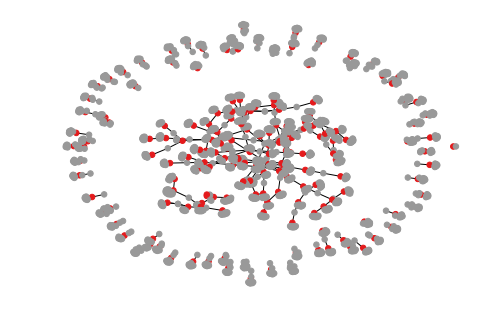

In [11]:
def buld_the_graph(_list_from, _list_to, _df_all_user):

    # Build a dataframe with your connections
    df = pd.DataFrame({ 'from':_list_from, 'to':_list_to})

#     # And a data frame with characteristics for your nodes
#     carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group1','group2','group3','group3'] })

    carac = _df_all_user

    # Build your graph
    G= nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )

    # The order of the node for networkX is the following order:
    G.nodes()
    # Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!

    # Here is the tricky part: I need to reorder carac to assign the good color to each node
    carac= carac.set_index('user_id')
    carac=carac.reindex(G.nodes())

    # And I need to transform my categorical column in a numerical value: group1->1, group2->2...
    carac['type']=pd.Categorical(carac['type'])
    carac['type'].cat.codes

    # Custom the nodes:
#     nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)

    nx.draw(G, with_labels=False, cmap=plt.cm.Set1, node_size=30, node_color=carac['type'].cat.codes)
#         nx.draw_spring(G, with_labels=False, cmap=plt.cm.Set1, node_size=30, node_color=carac['type'].cat.codes)  
#     nx.draw_circular(G)  
#     nx.draw_spectral(G)  
#     nx.draw_spring(G)

list_from , list_to, df_all_user = prepare_from_to(df_impersonator)
buld_the_graph(list_from, list_to, df_all_user)


In [12]:
def prepare_just_impersonators(_df_impersonator, _df_impersonator_all):
    
    df_impersonator = _df_impersonator
    df_impersonator_all = _df_impersonator_all

    # get all impersonator ids
    list_impersonators_all = df_impersonator_all['user_id'].tolist()

    # initialize nodes
    list_from = []
    list_to = []

    def convert_connection_tolist(_row):

        # followee
        for item in _row['followee_list']:
            # check if is impersonator
            if item in list_impersonators_all:
                list_from.append(_row['user_id'])
                list_to.append(item)

        # follower        
        for item in _row['follower_list']:
            # check if is impersonator
            if item in list_impersonators_all:
                list_from.append(item)
                list_to.append(_row['user_id'])

        return _row

    df_impersonator = df_impersonator.apply(convert_connection_tolist, axis=1)
    
    list_all = list_from + list_to
    list_all = pd.Series(list_all).drop_duplicates().tolist()
    list_similarity = []
    
    for item in list_all:
        df_temp = df_impersonator_all[df_impersonator_all['user_id'] == item].iloc[0]
        list_similarity.append(mean([df_temp['similarity_username'], df_temp['similarity_full_name'], df_temp['similarity_biography'], df_temp['similarity_photo'] ]))
        
    
    # bidirectional edges
    def cal_bidirection_nodes():

        list_relation = []
        for i in range(len(list_from)):
            temp_item = 'simple'
            # store data
            from_temp = list_from[i]
            to_temp = list_to[i]

            # find index from from_list
            index_list = [i for i,x in enumerate(list_from) if x==to_temp]
            for j in range(len(index_list)):
                if (list_to[index_list[j]] == from_temp):
                    temp_item = 'bidirectional'

            list_relation.append(temp_item)
        return list_relation
    
    list_direction = cal_bidirection_nodes()

    return list_from, list_to, list_similarity, list_direction


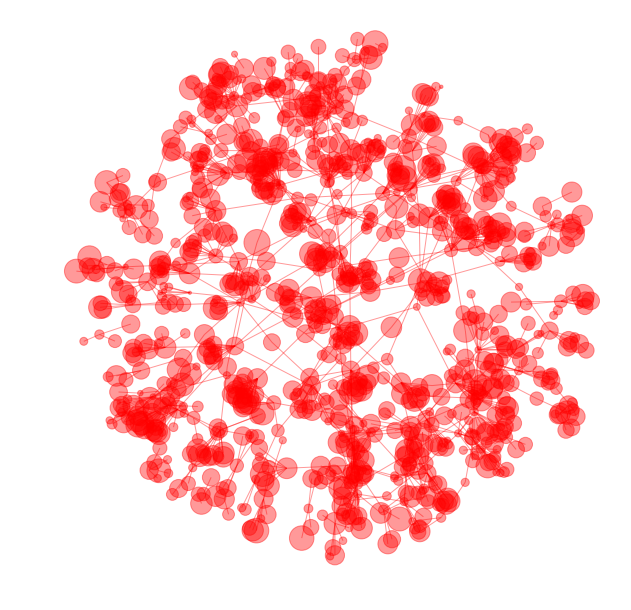

In [13]:
def buld_the_graph_imp(_list_from, _list_to, _list_similarity):

    plt.figure(figsize=(8,8))
    
    # Build a dataframe with your connections
    df = pd.DataFrame({ 'from':_list_from, 'to':_list_to})

#     # And a data frame with characteristics for your nodes
#     carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group1','group2','group3','group3'] })

#     carac = _df_all_user

    # Build your graph
    G= nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )

    # The order of the node for networkX is the following order:
    G.nodes()
    # Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
    
    d = nx.degree(G)
            

#     # Here is the tricky part: I need to reorder carac to assign the good color to each node
#     carac= carac.set_index('user_id')
#     carac=carac.reindex(G.nodes())

#     # And I need to transform my categorical column in a numerical value: group1->1, group2->2...
#     carac['type']=pd.Categorical(carac['type'])
#     carac['type'].cat.codes

    # Custom the nodes:
#     nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)

    pos = nx.spring_layout(G,k=0.15,iterations=110)
#     pos = nx.spring_layout(G, scale=5)
    nx.draw(G, pos, with_labels=False, cmap=plt.cm.Set1, edge_color="red", width=1, alpha=0.4, node_size=[v * 800 for v in _list_similarity])
#         nx.draw_spring(G, with_labels=False, cmap=plt.cm.Set1, node_size=30, node_color=carac['type'].cat.codes)  
#     nx.draw_circular(G)  
#     nx.draw_spectral(G)  
#     nx.draw_spring(G)

    plt.savefig("plot_04network_P1.pdf", bbox_inches='tight')
    plt.show()



list_from , list_to, list_similarity, list_direction = prepare_just_impersonators(df_impersonator, df_impersonator_all)
buld_the_graph_imp(list_from, list_to, list_similarity)

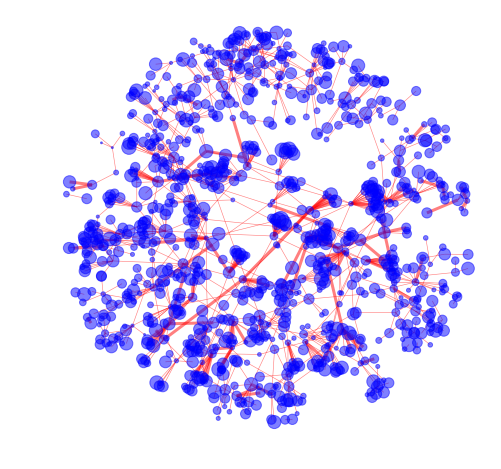

In [19]:
def buld_the_graph_imp2(_list_from, _list_to, _list_similarity, _list_direction):

    plt.figure(figsize=(8,8))
    
    
    # Build a dataframe with your connections
    df = pd.DataFrame({ 'from':_list_from, 'to':_list_to, 'direction': _list_direction})
    # Build your graph
    G= nx.from_pandas_edgelist(df, 'from', 'to', ['direction'], create_using=nx.Graph() )
    # The order of the node for networkX is the following order:
    G.nodes()
    
    
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['direction'] == 'simple']
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['direction'] == 'bidirectional']
            
                               
                               
    # positions for all nodes
    pos = nx.spring_layout(G,k=0.39,iterations=280)  
    # nodes
    nx.draw_networkx_nodes(G, pos, alpha=0.5, node_color='blue', node_size=[v * 250 for v in _list_similarity])

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, alpha=0.5, width=3, edge_color='red')
    nx.draw_networkx_edges(G, pos, edgelist=esmall, alpha=0.5, width=0.6, edge_color='red')
    
    # labels
#     nx.draw_networkx_labels(G, pos)#, font_size=20, font_family='sans-serif')


                               
    plt.axis('off')
    plt.savefig("plot_04network_P2.pdf", bbox_inches='tight')
    plt.show()



list_from , list_to, list_similarity, list_direction = prepare_just_impersonators(df_impersonator, df_impersonator_all)
buld_the_graph_imp2(list_from, list_to, list_similarity, list_direction)

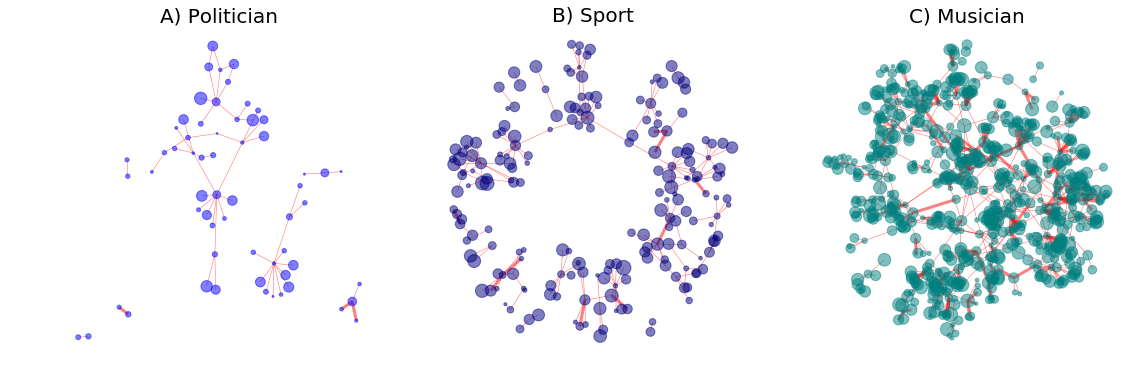

In [26]:
def buld_the_graph_imp_communities():
    
    figure, axes = plt.subplots(1, 3, figsize=(19,6))
    
    list_communities_graph = [
        df_imp_politician,
        df_imp_sportplayer,
        df_imp_musician
    ]
    
    list_configs = [
        {'k': 0.07, 'iteration': 15, 'color': 'blue'},
        {'k': 0.3, 'iteration': 100, 'color': 'navy'},
        {'k': 0.45, 'iteration': 350, 'color': 'teal'},
    ]
    
    list_title = [
        "A) Politician",
        "B) Sport",
        "C) Musician",
    ]
    
    counter = 0
    for community in list_communities_graph:
        
        list_from , list_to, list_similarity, list_direction = prepare_just_impersonators(list_communities_graph[counter], df_impersonator_all)

        # Build a dataframe with your connections
        df = pd.DataFrame({ 'from':list_from, 'to':list_to, 'direction': list_direction})
        # Build your graph
        G= nx.from_pandas_edgelist(df, 'from', 'to', ['direction'], create_using=nx.Graph() )
        # The order of the node for networkX is the following order:
        G.nodes()


        esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['direction'] == 'simple']
        elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['direction'] == 'bidirectional']


        # positions for all nodes
        pos = nx.spring_layout(G,k=list_configs[counter]['k'],iterations=list_configs[counter]['iteration'])  
        # nodes
        nx.draw_networkx_nodes(G, pos, node_color=list_configs[counter]['color'], alpha=0.5, node_size=[v * 250 for v in list_similarity], ax=axes[counter])

        # edges
        nx.draw_networkx_edges(G, pos, edgelist=elarge, alpha=0.5, width=3, edge_color='red', ax=axes[counter])
        nx.draw_networkx_edges(G, pos, edgelist=esmall, alpha=0.5, width=0.6, edge_color='red', ax=axes[counter])

        ax=axes[counter].axis('off')
        axes[counter].title.set_text(list_title[counter])
        
            
        # labels
        # nx.draw_networkx_labels(G, pos)#, font_size=20, font_family='sans-serif')
        counter += 1
    
    
    for ax in axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(20)
                               
    plt.savefig("plot_04network_P3.pdf", bbox_inches='tight')
    plt.show()


buld_the_graph_imp_communities()